In [37]:
!pip install -U "jpype1<1.1"

In [38]:
!pip install konlpy
!pip install wordcloud

In [39]:
## 기본
import numpy as np  # numpy 패키지 가져오기
import pandas as pd # pandas 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import matplotlib as mp

# %matplotlib inline
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import seaborn as sns
# import re

# mp.rcParams['axes.unicode_minus'] = False


## 데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [40]:
pip list

Package                            VersionNote: you may need to restart the kernel to use updated packages.

---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref

In [41]:
fm = mp.font_manager.FontManager()
plt.rcParams["font.family"] = 'Malgun Gothic'

In [42]:
pd.set_option('display.max_columns',100)

In [43]:
df = pd.read_csv('E:/VSC/crime_analysis/NewsResult_20110715-20210716.csv',sep=',',  thousands = ',')
df.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100201e+06,20210709,국민일보,권남영,“어른 잘못도” 서당 폭행 선고에 언급된 ‘나의 아저씨’,사회>사건_사고,문화>방송_연예,문화>출판,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,정성호,아이유","창원지법,하동,경남","소년,검찰,tvN,B군,A군","어른,서당,폭행,선고,언급,아저씨,서당,경남,하동,엽기,폭행,선고,재판장,이례적,유...","창원지법,아이유,가해자,이선균,소년범,판결문,재판장,부장판사,소년부,가해자들,등장인...",경남 하동 서당에서 벌어진 ‘엽기 폭행’ 선고에서 재판장이 이례적으로 유명 드라마를...,http://news.kmib.co.kr/article/view.asp?arcid=...,NaN
1,1.100801e+06,20210708,조선일보,김준호 기자,“이선균 같은 어른은 적다” 서당 폭행 재판서 언급된 ‘나저씨’,사회>사건_사고,문화>출판,사회>여성,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,정,정성호,아이유","창원지법,청학동","창원지방법원,소년,형사1부,소년부,검찰,가정법원,진주지원,재판부,C군,tvN,여주인...","이선균,어른,서당,폭행,재판서,언급,나저씨,분위기,재판장,판사,드라마,아저씨,이야기...","소년부,피해자,소년범,재판부,아이유,가해자,재판장,소년법,이선균,진주지원,창원지방법...",엄숙한 분위기의 재판장에서 판사가 돌연 드라마 ‘나의 아저씨’ 이야기를 꺼냈다. “...,https://www.chosun.com/national/regional/yeong...,NaN
2,1.100611e+06,20210708,서울신문,이보희,“이선균 같은 어른 많지 않아” 서당 폭행 선고서 ‘나의 아저씨’ 언급,사회>사건_사고,문화>출판,문화>방송_연예,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,이지은,정성호,아이유","창원지법,청학동,하동,경남","소년,형사1부,소년부,검찰,가정법원,tvN,C군,A군","이선균,어른,선고서,서당,폭행,아저씨,언급,정성호,부장,판사,교화,기회,형사처벌,소...","소년부,아이유,이선균,창원지법,가해자,부장판사,정성호,소년범,형사처벌,하동,등장인물...","경남 하동 서당에서 벌어진 ‘엽기 폭행’ 선고에서 재판장이 이지은(아이유), 이선균...",http://www.seoul.co.kr/news/newsView.php?id=20...,NaN
3,2.100801e+06,20210708,아시아경제,최석진,"법원, 청학동 서당 '엽기 폭행' 10대 2명 법정구속",사회>사건_사고,사회>여성,사회>교육_시험,범죄>범죄일반>폭행,NaN,NaN,"장은,정성호","창원지법,청학동,하동군","창원지방법원,소년부,검찰,형사1부(부장판사,진주지원,재판부,법원,검찰청,B군,A군","법원,청학동,서당,엽기,폭행,법정구속,법정,구속,청학동,서당,또래,학생,엽기,폭행,...","피해자,청학동,법정구속,a군,부정기형,재판부,10대,공소사실,진주지원,검찰청,소년법...",[아시아경제 최석진 법조전문기자] 청학동 서당에서 또래 학생에게 엽기 폭행을 저지른...,https://www.asiae.co.kr/article/20210708171656...,NaN
4,1.100701e+06,20210704,세계일보,강소영,"“동거한 애인 보고 싶어 음악방송 때 움직였다” 신창원, 907일의 도주 뒷 이야기",문화>방송_연예,사회>사건_사고,문화>학술_문화재,범죄>범죄일반>절도,NaN,NaN,신창원,"서울,강동구,농원,천안,천호동,순천,전남","부산교도소,뉴시스,환기구 쇠창살","동거,애인,음악방송,신창원,907일,도주,이야기,도주,희대,탈옥수,신창원,뉴시스,희...","신창원,교도소,부산교도소,환기구,천호동,화장실,서울,강동구,음악방송,동거녀,순천,주...",희대의 탈옥수로 불리던 신창원. 뉴시스 \r\n 희대의 탈옥수 신창원(사진)의 탈옥...,http://www.segye.com/content/html/2021/07/04/2...,NaN


In [44]:
df.shape

(2083, 19)

In [45]:
df.isnull().sum()

뉴스 식별자                  0
일자                      0
언론사                     0
기고자                   363
제목                      0
통합 분류1                  0
통합 분류2                308
통합 분류3                828
사건/사고 분류1               0
사건/사고 분류2             536
사건/사고 분류3            1228
인물                    456
위치                    284
기관                     13
키워드                     0
특성추출(가중치순 상위 50개)       0
본문                      0
URL                   345
분석제외 여부              2002
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   뉴스 식별자             2083 non-null   float64
 1   일자                 2083 non-null   int64  
 2   언론사                2083 non-null   object 
 3   기고자                1720 non-null   object 
 4   제목                 2083 non-null   object 
 5   통합 분류1             2083 non-null   object 
 6   통합 분류2             1775 non-null   object 
 7   통합 분류3             1255 non-null   object 
 8   사건/사고 분류1          2083 non-null   object 
 9   사건/사고 분류2          1547 non-null   object 
 10  사건/사고 분류3          855 non-null    object 
 11  인물                 1627 non-null   object 
 12  위치                 1799 non-null   object 
 13  기관                 2070 non-null   object 
 14  키워드                2083 non-null   object 
 15  특성추출(가중치순 상위 50개)  2083 non-null   object 
 16  본문                 2083 

In [47]:
from konlpy.tag import Okt
twitter = Okt()

In [56]:
word_list = []                      # 단어리스트 만들기
# word_list = df.iloc[0:,2:17]

word_list = df['특성추출(가중치순 상위 50개)']
# word_list = df['특성추출(가중치순 상위 50개)']
# word_list = df['본문']
word_list


0       창원지법,아이유,가해자,이선균,소년범,판결문,재판장,부장판사,소년부,가해자들,등장인...
1       소년부,피해자,소년범,재판부,아이유,가해자,재판장,소년법,이선균,진주지원,창원지방법...
2       소년부,아이유,이선균,창원지법,가해자,부장판사,정성호,소년범,형사처벌,하동,등장인물...
3       피해자,청학동,법정구속,a군,부정기형,재판부,10대,공소사실,진주지원,검찰청,소년법...
4       신창원,교도소,부산교도소,환기구,천호동,화장실,서울,강동구,음악방송,동거녀,순천,주...
                              ...                        
2078    재판부,성폭력,소년부,전자발찌,소년보호처분,요건상,소년범,1심,고등법원,2회,사회봉...
2079    전자발찌,피고인,서울고등법원,성폭력,습벽,위치추적전자장치,2회,만큼,1심,수원지방법...
2080    성폭력,서울고등법원,전자발찌,2회,소년범,재판부,소년부,소년보호처분,성폭행,항소심,...
2081    전자장치,성폭력,재판부,전자발찌,소년부,소년보호처분,2회,요건상,소년범,1심,고등법...
2082    전자장치,고등법원,소년범,성폭력,소년보호처분,2회,요건상,1심,재판부,서울고법,사회...
Name: 특성추출(가중치순 상위 50개), Length: 2083, dtype: object

In [57]:
word_list.head()

0    창원지법,아이유,가해자,이선균,소년범,판결문,재판장,부장판사,소년부,가해자들,등장인...
1    소년부,피해자,소년범,재판부,아이유,가해자,재판장,소년법,이선균,진주지원,창원지방법...
2    소년부,아이유,이선균,창원지법,가해자,부장판사,정성호,소년범,형사처벌,하동,등장인물...
3    피해자,청학동,법정구속,a군,부정기형,재판부,10대,공소사실,진주지원,검찰청,소년법...
4    신창원,교도소,부산교도소,환기구,천호동,화장실,서울,강동구,음악방송,동거녀,순천,주...
Name: 특성추출(가중치순 상위 50개), dtype: object

In [58]:
sentences_tag = []

for sentence in word_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

print(morph)

[('전자', 'Noun'), ('장치', 'Noun'), (',', 'Punctuation'), ('고등법원', 'Noun'), (',', 'Punctuation'), ('소년범', 'Noun'), (',', 'Punctuation'), ('성폭력', 'Noun'), (',', 'Punctuation'), ('소년', 'Noun'), ('보호처분', 'Noun'), (',', 'Punctuation'), ('2회', 'Number'), (',', 'Punctuation'), ('요건', 'Noun'), ('상', 'Suffix'), (',', 'Punctuation'), ('1', 'Number'), ('심', 'Noun'), (',', 'Punctuation'), ('재판', 'Noun'), ('부', 'Noun'), (',', 'Punctuation'), ('서울', 'Noun'), ('고법', 'Noun'), (',', 'Punctuation'), ('사회', 'Noun'), ('봉사', 'Noun'), (',', 'Punctuation'), ('보호처분', 'Noun'), (',', 'Punctuation'), ('전자발찌', 'Noun'), (',', 'Punctuation'), ('성폭행', 'Noun'), (',', 'Punctuation'), ('소년원', 'Noun'), (',', 'Punctuation'), ('입원', 'Noun'), ('치료', 'Noun'), (',', 'Punctuation'), ('항소심', 'Noun'), (',', 'Punctuation'), ('특수강', 'Noun'), ('도', 'Josa'), ('강간', 'Noun'), (',', 'Punctuation'), ('증거조사', 'Noun'), (',', 'Punctuation'), ('범죄자', 'Noun'), (',', 'Punctuation'), ('특정', 'Noun'), ('범죄자', 'Noun'), (',', 'Punctuation'), ('가정법원

In [59]:
sentences_tag

[[('창원', 'Noun'),
  ('지법', 'Noun'),
  (',', 'Punctuation'),
  ('아이유', 'Noun'),
  (',', 'Punctuation'),
  ('가해자', 'Noun'),
  (',', 'Punctuation'),
  ('이선균', 'Noun'),
  (',', 'Punctuation'),
  ('소년범', 'Noun'),
  (',', 'Punctuation'),
  ('판결', 'Noun'),
  ('문', 'Noun'),
  (',', 'Punctuation'),
  ('재판', 'Noun'),
  ('장', 'Suffix'),
  (',', 'Punctuation'),
  ('부장', 'Noun'),
  ('판사', 'Noun'),
  (',', 'Punctuation'),
  ('소년', 'Noun'),
  ('부', 'Noun'),
  (',', 'Punctuation'),
  ('가해자', 'Noun'),
  ('들', 'Suffix'),
  (',', 'Punctuation'),
  ('등장인물', 'Noun'),
  (',', 'Punctuation'),
  ('하동', 'Noun'),
  (',', 'Punctuation'),
  ('경남', 'Noun'),
  (',', 'Punctuation'),
  ('성', 'Modifier'),
  ('보호', 'Noun'),
  (',', 'Punctuation'),
  ('조부모', 'Noun'),
  (',', 'Punctuation'),
  ('b', 'Alpha'),
  ('군', 'Noun'),
  (',', 'Punctuation'),
  ('a', 'Alpha'),
  ('군', 'Noun'),
  (',', 'Punctuation'),
  ('학교폭력', 'Noun'),
  (',', 'Punctuation'),
  ('tvn', 'Alpha'),
  (',', 'Punctuation'),
  ('결정', 'Noun'),
  ('문', '

In [60]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [61]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['창원',
 '지법',
 '아이유',
 '가해자',
 '이선균',
 '소년범',
 '판결',
 '재판',
 '부장',
 '판사',
 '소년',
 '가해자',
 '등장인물',
 '하동',
 '경남',
 '보호',
 '조부모',
 '학교폭력',
 '결정',
 '직장인',
 '형사',
 '처벌',
 '진주',
 '소년',
 '피해자',
 '소년범',
 '재판',
 '아이유',
 '가해자',
 '재판',
 '소년법',
 '이선균',
 '진주',
 '지원',
 '창원',
 '지방법원',
 '피고인',
 '피고',
 '가해자',
 '소년',
 '보호처분',
 '물질',
 '조부모',
 '보호',
 '소년',
 '아이유',
 '이선균',
 '창원',
 '지법',
 '가해자',
 '부장',
 '판사',
 '정성호',
 '소년범',
 '형사',
 '처벌',
 '하동',
 '등장인물',
 '가해자',
 '경남',
 '소년',
 '보호처분',
 '차례',
 '가혹',
 '행위',
 '조부모',
 '보호',
 '피해자',
 '청학동',
 '법정구속',
 '부정',
 '기형',
 '재판',
 '공소',
 '사실',
 '진주',
 '지원',
 '검찰청',
 '소년법',
 '부장',
 '판사',
 '정성호',
 '하동군',
 '물질',
 '보호',
 '아이',
 '소년',
 '부정',
 '창원',
 '지법',
 '남자',
 '기숙사',
 '피의자',
 '차례',
 '신창원',
 '교도소',
 '부산',
 '교도소',
 '기구',
 '천호동']

In [62]:
counts = Counter(noun_list)
tags = counts.most_common(100)
tags

[('소년범', 1526),
 ('소년', 670),
 ('피해자', 666),
 ('소년법', 641),
 ('재판', 555),
 ('인천', 549),
 ('부산', 522),
 ('가해자', 459),
 ('청소년', 423),
 ('형사', 422),
 ('사건', 406),
 ('경찰서', 385),
 ('범죄', 385),
 ('서울', 382),
 ('미성년', 375),
 ('소년원', 298),
 ('지법', 292),
 ('학생', 284),
 ('성폭력', 270),
 ('피고인', 261),
 ('경찰청', 255),
 ('청원', 252),
 ('학교폭력', 251),
 ('아이', 250),
 ('처벌', 243),
 ('폭행', 241),
 ('보호', 236),
 ('부장', 232),
 ('판사', 229),
 ('사회', 220),
 ('여중생', 217),
 ('보호관찰', 216),
 ('위원회', 216),
 ('살인', 212),
 ('법무부', 203),
 ('잔혹', 203),
 ('범죄자', 203),
 ('보호처분', 202),
 ('촉법소년', 201),
 ('성폭행', 201),
 ('청와대', 199),
 ('피의자', 191),
 ('대구', 184),
 ('관계자', 184),
 ('전문가', 182),
 ('수사', 172),
 ('변호사', 165),
 ('경찰', 164),
 ('양형', 160),
 ('가능성', 153),
 ('폭력', 153),
 ('촉법', 149),
 ('부정', 147),
 ('혐의', 147),
 ('개월', 144),
 ('경찰관', 144),
 ('만큼', 143),
 ('한국', 143),
 ('재범', 140),
 ('항소심', 139),
 ('기형', 138),
 ('학교', 137),
 ('중학생', 136),
 ('집단', 135),
 ('단기', 135),
 ('행위', 132),
 ('광주', 131),
 ('상해', 129),
 ('중학교', 128),

{'소년범': 1526, '소년': 670, '피해자': 666, '소년법': 641, '재판': 555, '인천': 549, '부산': 522, '가해자': 459, '청소년': 423, '형사': 422, '사건': 406, '경찰서': 385, '범죄': 385, '서울': 382, '미성년': 375, '소년원': 298, '지법': 292, '학생': 284, '성폭력': 270, '피고인': 261, '경찰청': 255, '청원': 252, '학교폭력': 251, '아이': 250, '처벌': 243, '폭행': 241, '보호': 236, '부장': 232, '판사': 229, '사회': 220, '여중생': 217, '보호관찰': 216, '위원회': 216, '살인': 212, '법무부': 203, '잔혹': 203, '범죄자': 203, '보호처분': 202, '촉법소년': 201, '성폭행': 201, '청와대': 199, '피의자': 191, '대구': 184, '관계자': 184, '전문가': 182, '수사': 172, '변호사': 165, '경찰': 164, '양형': 160, '가능성': 153, '폭력': 153, '촉법': 149, '부정': 147, '혐의': 147, '개월': 144, '경찰관': 144, '만큼': 143, '한국': 143, '재범': 140, '항소심': 139, '기형': 138, '학교': 137, '중학생': 136, '집단': 135, '단기': 135, '행위': 132, '광주': 131, '상해': 129, '중학교': 128, '민주당': 128, '절도': 127, '성매매': 122, '징역': 121, '선고': 120, '전북': 119, '성년': 116, '최고': 114, '차례': 113, '징역형': 113, '익산': 112, '미국': 110, '친구': 108, '선도': 108, '특정': 107, '교도소': 103, '성범죄': 103, '범행': 103, '무

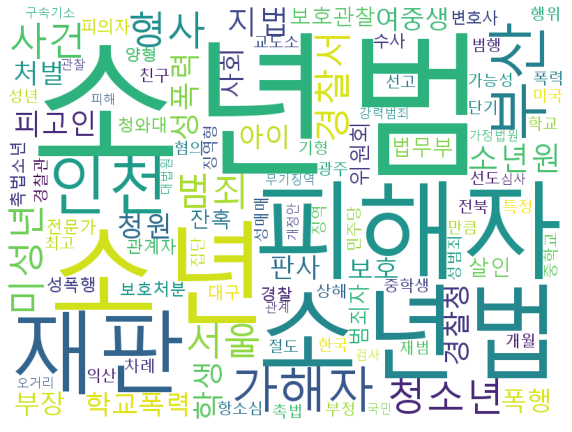

In [63]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)

print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()